### Analysis of On-premise API Inference Results for 100 Eurosat images Notebook 

This notebook ingests .csv file containing the inference results for 100 Eurosat test images and computes the average confidence, latency, inference time. The notebook also generates visuals to interpret these metrics. 


In [ ]:
# Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Read in .csv file saving the inference results 
batch_df = pd.read_csv("./api_results_100_images.csv") # Change to path to where your results .csv file is stored 
print("Header of results for 100 test images:")
# Check header of csv file
display(batch_df.head())

# Compute average confidence over the 100 images 
avg_conf = batch_df["confidence"].mean() 
print(f"Avg_confidence for 100 test images:{avg_conf:.2f}")

# Compute average full end-to-end API latency_ms over the 100 images
# This is total time for file upload, file save, inference, DB insert, JSON serialization, and network return 
avg_latency = batch_df["latency_ms"].mean()
print(f"Avg_latency (ms) for 100 test images: {avg_latency:.2f} ms")

# Compute average inference_ms over the 100 images
# This is the time taken to complete a forward pass and generate a prediction)
avg_inference = batch_df["inference_ms"].mean() 
print(f"Avg_inference (ms) for 100 test images: {avg_inference:.2f} ms")

Header of results for 100 test images:


,confidence,created_at,filename,inference_ms,latency_ms,predicted_label,prediction_id,resources,true_label
0,0.609820,2025-11-30T16:19:31.745107,20251130_161931_AnnualCrop_1275.jpg,18.63,18.84,Pasture,2,"{'cpu_percent': 0.8, 'memory_percent': 56.3, '...",AnnualCrop
1,0.903047,2025-11-30T16:19:31.903559,20251130_161931_Residential_504.jpg,18.55,18.88,Pasture,3,"{'cpu_percent': 0.0, 'memory_percent': 56.3, '...",Residential
2,0.860408,2025-11-30T16:19:32.063532,20251130_161932_Pasture_787.jpg,24.05,24.83,Pasture,4,"{'cpu_percent': 5.5, 'memory_percent': 56.4, '...",Pasture
3,0.918940,2025-11-30T16:19:32.230390,20251130_161932_Residential_1575.jpg,22.06,23.23,Pasture,5,"{'cpu_percent': 3.2, 'memory_percent': 56.4, '...",Residential
4,0.879034,2025-11-30T16:19:32.388614,20251130_161932_Pasture_473.jpg,22.32,22.98,Pasture,6,"{'cpu_percent': 0.0, 'memory_percent': 56.4, '...",Pasture


Avg_confidence for 100 test images:0.90
Avg_latency (ms) for 100 test images: 20.94 ms
Avg_inference (ms) for 100 test images: 20.07 ms


### Plot Latency (ms) vs. Timestamp 

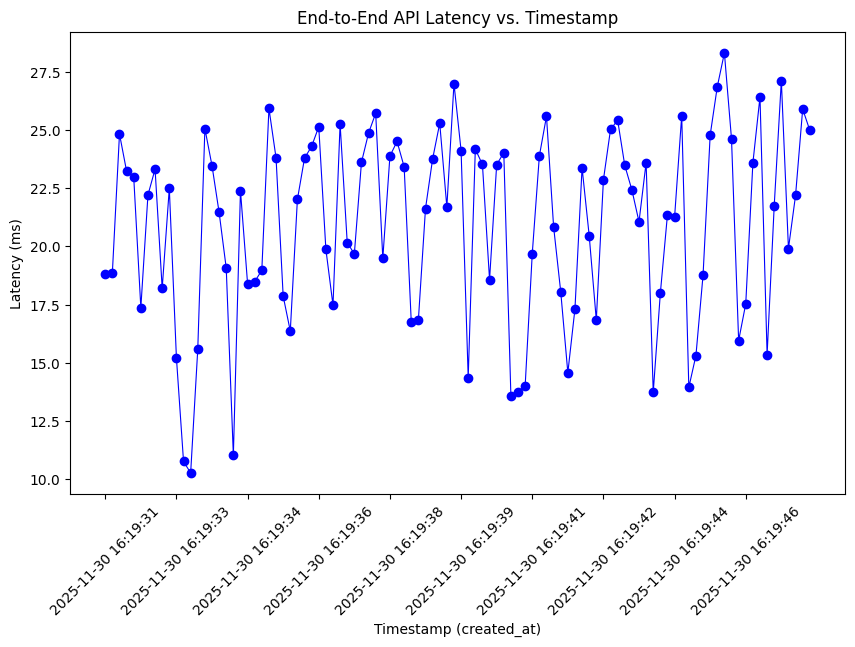

In [ ]:
# Plotting latency_ms vs.timestamp 

fig = plt.figure(figsize=(10,6))

# Add an axes object to the figure
ax = fig.add_subplot(111)

batch_df["created_at"] = pd.to_datetime(batch_df["created_at"])
# Plot all data 
plt.plot(batch_df.index, batch_df["latency_ms"], color="blue", marker='o', linewidth=0.8)

# Use index for x-axis 
ax= plt.gca() 

# Plot only every other 10th timestamp for clean visual 
ax.set_xticks(batch_df.index[::10])
ax.set_xticklabels(batch_df["created_at"].dt.strftime("%Y-%m-%d %H:%M:%S")[::10], rotation=45)

plt.xlabel("Timestamp (created_at)")
plt.ylabel("Latency (ms)")
plt.title("End-to-End API Latency vs. Timestamp")
plt.show()

### Boxplot of latency for 100 images

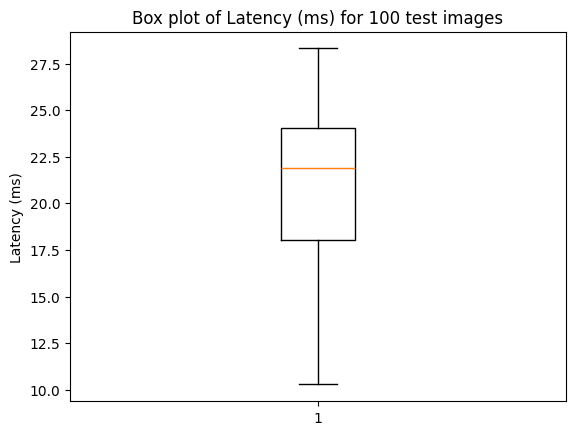

In [ ]:
# Plot distribution of latency for the 100 images as boxplot
plt.boxplot(batch_df["latency_ms"])
plt.title("Box plot of Latency (ms) for 100 test images")
plt.ylabel("Latency (ms)")
plt.show()